# CO2 emissions of cars

Data from https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [170]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading the data

### Read column/value definitions
These were provided with the dataset.

Will edit the read dataframe for nice formatting.

In [171]:
def ExtractMeaning(s):
    try:
        return s.split('=')[1]
    except IndexError:
        return s.split('=')[0]

In [172]:
# Read description of data columns/values to refer back to later
desc = pd.read_csv('data/Data Description.csv')
desc.columns = ['Column title', 'Value meaning']

# Split 'Value meaning' in two
desc['Value'] = desc['Value meaning'].apply(lambda s: s.split('=')[0])
desc['Meaning'] = desc['Value meaning'].apply(ExtractMeaning)
desc.drop('Value meaning', axis=1, inplace=True)

# Set index
titles = pd.Series(['Model']*6 + ['Transmission']*6 + ['Fuel type']*5 + ['Fuel consumption', 'CO2 emissions'])
desc['Column title'] = titles
desc.set_index(['Column title','Value'], inplace=True)

In [173]:
desc

Meaning
Column title     Value                                                                                                
Model            4WD/4X4                                                                              Four-wheel drive
                 AWD                                                                                   All-wheel drive
                 FFV                                                                             Flexible-fuel vehicle
                 SWB                                                                                   Short wheelbase
                 LWB                                                                                    Long wheelbase
                 EWB                                                                                Extended wheelbase
Transmission     A                                                                                           automatic
                 AM                                                                                   automated manual
                 AS                                                                        automatic with select shift
                 AV                                                                              continuously variable
                 M                                                                                              manual
                 3 - 10                                                                                Number of gears
Fuel type        X                                                                                    regular gasoline
                 Z                                                                                    premium gasoline
                 D                                                                                              diesel
                 E                                                                                       ethanol (E85)
                 N                                                                                         natural gas
Fuel consumption City and highway fuel consumption ratings are s...  City and highway fuel consumption ratings are ...
CO2 emissions    the tailpipe emissions of carbon dioxide (in gr...  the tailpipe emissions of carbon dioxide (in g...

### Read data

In [174]:
emissions = pd.read_csv('data/CO2 Emissions_Canada.csv')

In [175]:
emissions.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## Exploratory data analysis

### Structure

In [176]:
emissions.shape

(7385, 12)

In [177]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

No missing data and data types all make sense.

In [178]:
emissions.describe(exclude='number')

,Make,Model,Vehicle Class,Transmission,Fuel Type
count,7385,7385,7385,7385,7385
unique,42,2053,16,27,5
top,FORD,F-150 FFV 4X4,SUV - SMALL,AS6,X
freq,628,32,1217,1324,3637


In [179]:
emissions.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


No obvious outliers from max/min/quartiles - will investigate further later.

Means are approximately equal to medians in each case - suggests normal distributions.

<AxesSubplot:title={'center':'Unique values per feature'}>

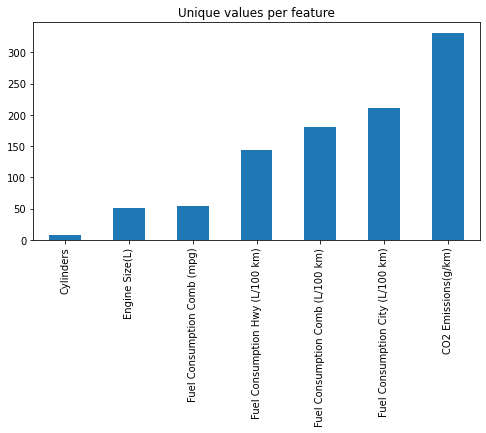

In [180]:
# Find number of unique values per numerical category to get idea of which are discrete/ordinal/continuous
unique_vals = emissions.select_dtypes(include="number").nunique().sort_values()
unique_vals.plot.bar(figsize=(8, 4), title="Unique values per feature")

Number of unique values in 'Fuel Consumption Comb (mpg)' much less than other fuel consumption categories as it appears the data gas been rounded to the nearest integer whereas the others are stored as floats.

### Data quality

In [181]:
# Check for duplicated rows
n_dup = emissions.duplicated().sum()
n_dup

1103

In [182]:
# Show duplicated rows
emissions[emissions.duplicated() == True]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [183]:
# It is unclear from the original data source/collection method why duplicated rows would be present so remove them.
emissions.drop_duplicates(inplace=True)

In [184]:
emissions.shape

(6282, 12)

N.B. Already concluded at the start that there are no missing values so nothing needs doing w.r.t. that.

It seemed as though there were no outliers earlier but investigate further to make sure.

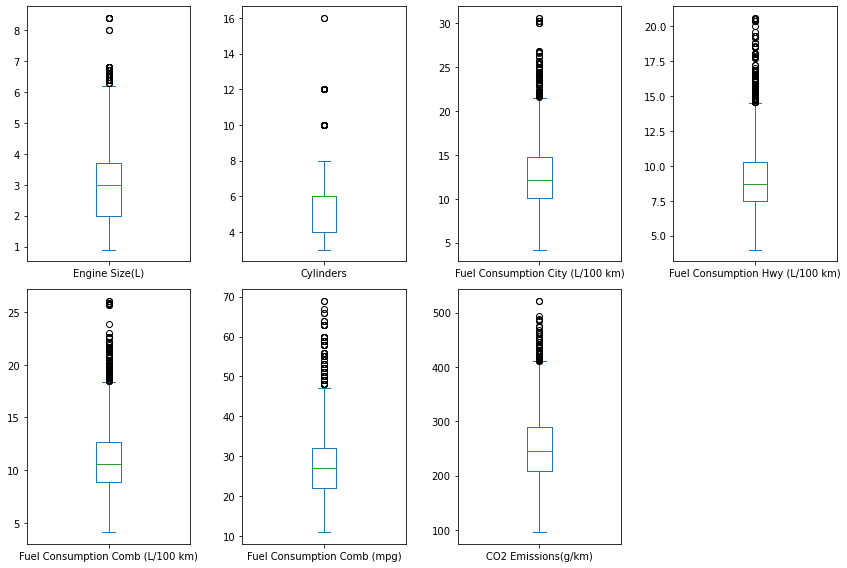

In [185]:
emissions.plot(kind='box', subplots=True, figsize=(12,8), layout=(2,4))
plt.tight_layout()

In [186]:
emissions[emissions['Cylinders']>8]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
14,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
19,ASTON MARTIN,VANQUISH,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
36,AUDI,A8L,FULL-SIZE,6.3,12,AS8,Z,18.7,11.5,15.5,18,363
47,AUDI,R8,TWO-SEATER,5.2,10,A7,Z,18.2,10.6,14.8,19,347
...,...,...,...,...,...,...,...,...,...,...,...,...
7286,ROLLS-ROYCE,Cullinan Black Badge,STATION WAGON - MID-SIZE,6.7,12,AS8,Z,20.1,12.1,16.5,17,386
7287,ROLLS-ROYCE,Dawn,COMPACT,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7288,ROLLS-ROYCE,Ghost,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400
7289,ROLLS-ROYCE,Ghost EWB,FULL-SIZE,6.6,12,AS8,Z,20.4,13.1,17.1,17,400


Cars do exist with a large number of cylinders (tend to be the more expensive ones, as seen above) -> not outliers.

There are also quite a few of these cars in this dataset -> do not remove.

In [187]:
emissions[emissions['Fuel Consumption Comb (mpg)']>50]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
415,FORD,FUSION HYBRID,MID-SIZE,2.0,4,AV,X,5.3,5.7,5.5,51,126
487,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,4.7,4.9,4.8,59,110
992,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,4.7,4.9,4.8,59,110
993,TOYOTA,PRIUS c,COMPACT,1.5,4,AV,X,4.6,4.9,4.7,60,108
994,TOYOTA,PRIUS v,STATION WAGON - MID-SIZE,1.8,4,AV,X,5.3,5.8,5.5,51,126
1047,VOLKSWAGEN,JETTA TURBO HYBRID,COMPACT,1.4,4,AM7,Z,5.6,5.2,5.4,52,124
1498,FORD,FUSION HYBRID,MID-SIZE,2.0,4,AV,X,5.4,5.8,5.5,51,126
1569,HONDA,ACCORD HYBRID,MID-SIZE,2.0,4,AV,X,4.7,5.3,5.0,56,115
1574,HONDA,CIVIC HYBRID,COMPACT,1.5,4,AV,X,5.3,5.0,5.2,54,120
2113,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,4.6,4.9,4.7,60,108


As with cylinders, the cars with large fuel consumption do exist (tend to be hybrids/small cars) -> not outliers.

### Data content

In [188]:
#sns.pairplot(emissions)

Histograms seem to be approximately gaussian (slight right skew in some cases).

Seems as though there are several groups of data points in the CO2 emissions distributions.

After some investigations, narrowed these groups down to 'Fuel Type'.

In [189]:
desc.loc['Fuel type']

,Meaning
Value,
X,regular gasoline
Z,premium gasoline
D,diesel
E,ethanol (E85)
N,natural gas


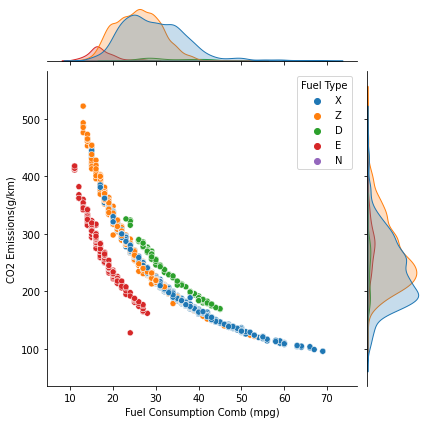

In [190]:
sns.jointplot(data=emissions, x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', hue='Fuel Type',
              hue_order='X Z D E N'.split())

In [191]:
#sns.pairplot(emissions, hue='Fuel Type', hue_order='X Z D E N'.split())

Cannot really see the natural gas cars in these plots, how many are there?

In [192]:
emissions[emissions['Fuel Type'] == 'N']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,15.2,9.5,12.7,22,213


Only one natural gas car in dataset so remove it.

In [193]:
emissions.shape

(6282, 12)

In [194]:
emissions.drop(emissions[emissions['Fuel Type'] == 'N'].index, inplace=True)

In [195]:
emissions.shape

(6281, 12)

As expected a few of the variables are very correlated:

<AxesSubplot:>

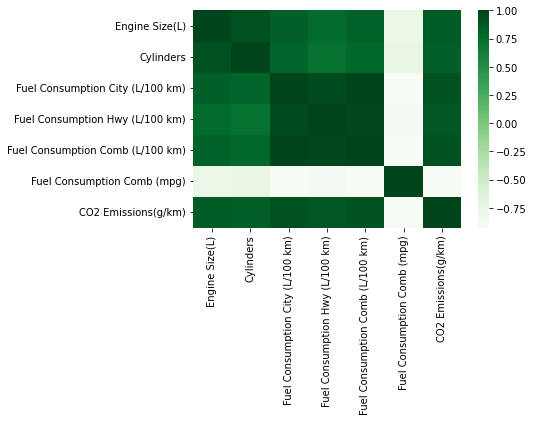

In [196]:
sns.heatmap(emissions.corr(), cmap='Greens')

There is high correlation between the two combined fuel consumption measurements (as expected with it being a simple unit conversion).

I will stick to UK fuel consumption measurement and neglect the City/Hwy distinction so drop unneeded columns.

In [197]:
emissions.drop(['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'],
              axis=1, inplace=True)

In [198]:
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,27,244


In [199]:
#sns.pairplot(emissions, hue='Fuel Type', hue_order='X Z D E N'.split())

<AxesSubplot:>

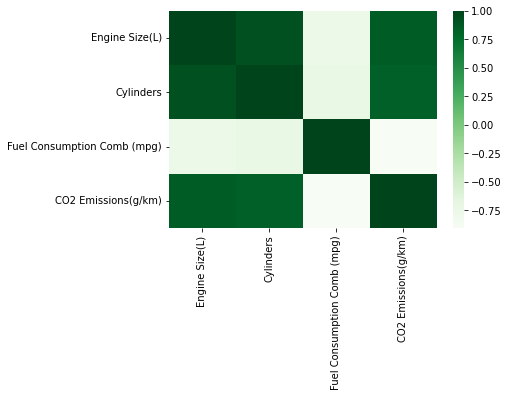

In [200]:
sns.heatmap(emissions.corr(), cmap='Greens')

What about the categorical columns?

In [201]:
emissions.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [202]:
emissions['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [203]:
desc.loc['Transmission']

,Meaning
Value,
A,automatic
AM,automated manual
AS,automatic with select shift
AV,continuously variable
M,manual
3 - 10,Number of gears


Transmission is in form 'Transmission+Number of gears'. Separate into two.

In [204]:
def ExtractGears(x):
    """
    Returns number of gears or zero if transmission type is 'AV'.
    """
    try:
        return int(''.join(filter(str.isdigit, x)))
    except ValueError:
        return 0

In [205]:
emissions['Gears'] = emissions['Transmission'].apply(lambda x: ExtractGears(x))

In [206]:
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,33,196,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,29,221,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,48,136,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,25,255,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,27,244,6


In [207]:
# Remove number from transmission column
emissions['Transmission'].replace('\d+', '', regex=True, inplace=True)

In [208]:
emissions['Gears'].value_counts()

6     2791
8     1513
7      880
9      329
5      276
0      241
10     188
4       63
Name: Gears, dtype: int64

In [209]:
emissions['Transmission'].value_counts()

AS    2721
A     1536
M     1019
AM     540
AV     465
Name: Transmission, dtype: int64

How do emissions vary with number of gears?

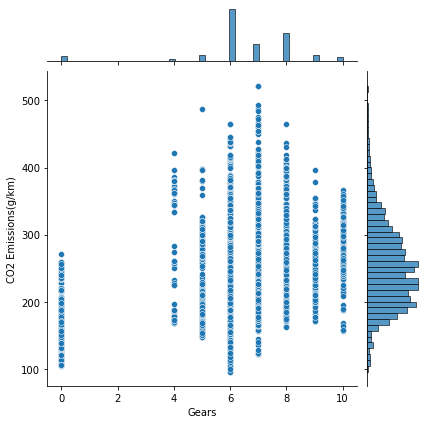

In [210]:
sns.jointplot(data=emissions, x='Gears', y='CO2 Emissions(g/km)')

No obvious trend here. What about transmission type?

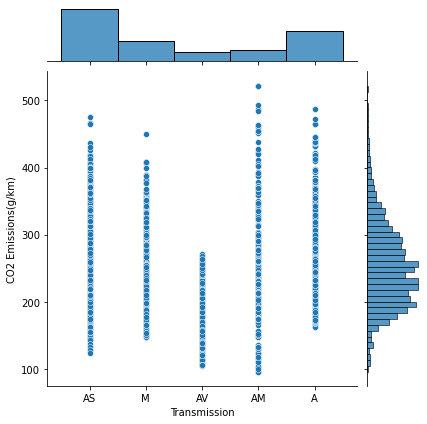

In [211]:
sns.jointplot(data=emissions, x='Transmission', y='CO2 Emissions(g/km)')

'AV' has lower emissions than other types. Likely due to fact that a lot are hybrids, as shown below:

In [212]:
emissions[emissions['Transmission']=='AV']['Model']

2                                   ILX HYBRID
20                                          A4
259                                      SPARK
342                               C-MAX HYBRID
415                              FUSION HYBRID
                         ...                  
7335                            Corolla Hybrid
7339                     Highlander Hybrid AWD
7340    Highlander Hybrid AWD Limited/Platinum
7341                                     Prius
7347                           RAV4 Hybrid AWD
Name: Model, Length: 465, dtype: object

Introduce dummy variables for the transmission and fuel type.

In [213]:
emissions = pd.get_dummies(emissions,columns=['Transmission', 'Fuel Type'], prefix=['Transmission', 'Fuel'], drop_first=True)

In [214]:
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel_E,Fuel_X,Fuel_Z
0,ACURA,ILX,COMPACT,2.0,4,33,196,5,0,1,0,0,0,0,1
1,ACURA,ILX,COMPACT,2.4,4,29,221,6,0,0,0,1,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,48,136,7,0,0,1,0,0,0,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,25,255,6,0,1,0,0,0,0,1
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,27,244,6,0,1,0,0,0,0,1


What about the class of the vehicle?

In [215]:
emissions['Vehicle Class'].value_counts()

SUV - SMALL                 1006
MID-SIZE                     982
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Count'>

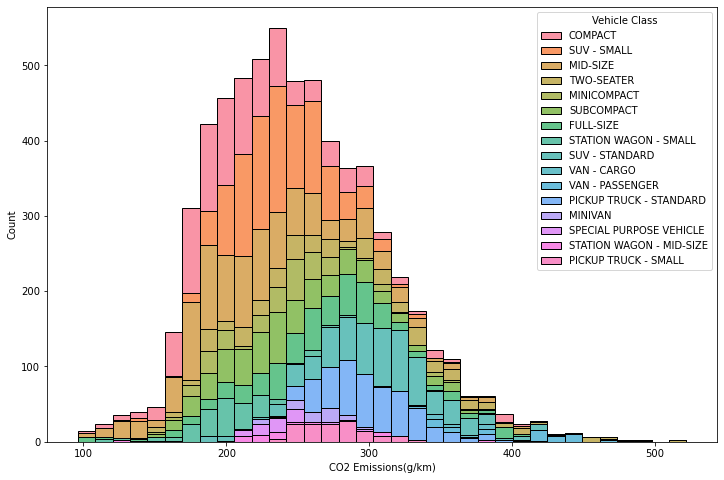

In [216]:
plt.figure(figsize=(12,8))
sns.histplot(data=emissions, x='CO2 Emissions(g/km)', bins=35, hue='Vehicle Class', multiple='stack')

Large number of types, some with very few counts. Will discard this column for now (try dummy variables later?).

In [217]:
emissions.drop('Vehicle Class', axis=1, inplace=True)

In [218]:
emissions.head()

,Make,Model,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel_E,Fuel_X,Fuel_Z
0,ACURA,ILX,2.0,4,33,196,5,0,1,0,0,0,0,1
1,ACURA,ILX,2.4,4,29,221,6,0,0,0,1,0,0,1
2,ACURA,ILX HYBRID,1.5,4,48,136,7,0,0,1,0,0,0,1
3,ACURA,MDX 4WD,3.5,6,25,255,6,0,1,0,0,0,0,1
4,ACURA,RDX AWD,3.5,6,27,244,6,0,1,0,0,0,0,1


What about the different car makes?

In [219]:
emissions['Make'].value_counts()

FORD             577
CHEVROLET        514
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: Make, dtype: int64

In [220]:
mean_CO2_by_make = emissions.groupby('Make').mean()['CO2 Emissions(g/km)']
std_CO2_by_make = emissions.groupby('Make').std()['CO2 Emissions(g/km)']

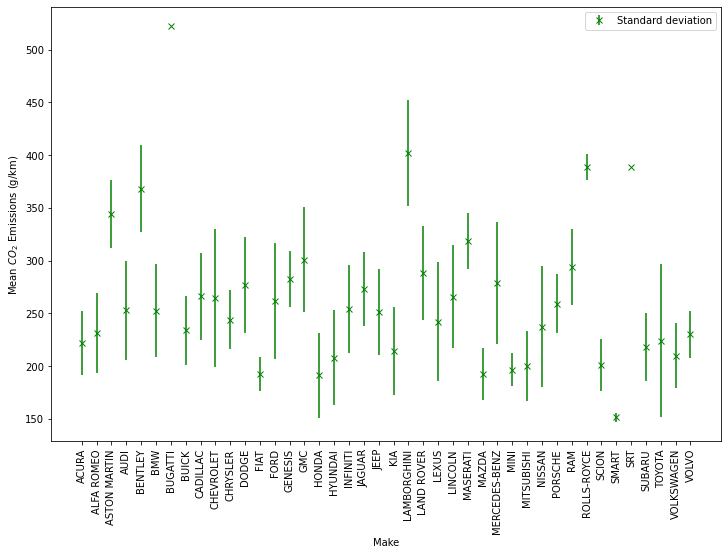

In [221]:
fig, ax = plt.subplots(figsize=(12,8))
means = ax.errorbar(x=mean_CO2_by_make.index, y=mean_CO2_by_make, yerr=std_CO2_by_make, fmt='gx', label='Standard deviation')
temp = plt.xticks(rotation=90) # Set to temp. variable to stop printout in jupyter notebook
ax.set_xlabel('Make')
ax.set_ylabel(r'Mean $CO_2$ Emissions (g/km)')
ax.legend()

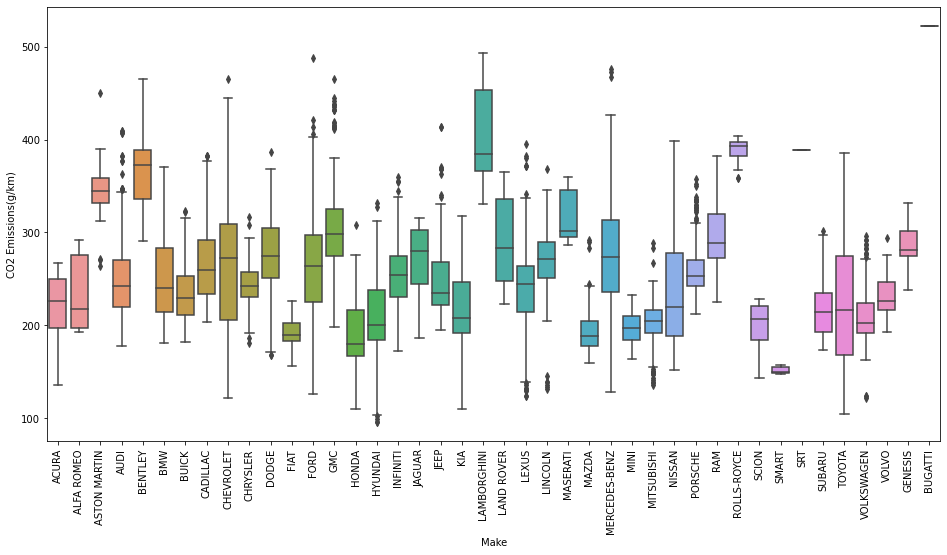

In [222]:
# Boxplot gives more information than swarmplot
# fig, ax = plt.subplots(figsize=(12,8))
# sns.swarmplot(data=emissions, x='Make', y='CO2 Emissions(g/km)', ax=ax, size=1)
# temp = plt.xticks(rotation=90) # Set to temp. variable to stop printout in jupyter notebook
plt.figure(figsize=(16,8))
sns.boxplot(data=emissions, x='Make', y='CO2 Emissions(g/km)')
temp = plt.xticks(rotation=90) # Set to temp. variable to stop printout in jupyter notebook

Interesting but there are too many makes to produce dummy variables so drop make/model columns.

In [223]:
emissions.drop(['Make', 'Model'], axis=1, inplace=True)

In [224]:
emissions.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Gears,Transmission_AM,Transmission_AS,Transmission_AV,Transmission_M,Fuel_E,Fuel_X,Fuel_Z
0,2.0,4,33,196,5,0,1,0,0,0,0,1
1,2.4,4,29,221,6,0,0,0,1,0,0,1
2,1.5,4,48,136,7,0,0,1,0,0,0,1
3,3.5,6,25,255,6,0,1,0,0,0,0,1
4,3.5,6,27,244,6,0,1,0,0,0,0,1


## Linear model

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [226]:
X = emissions.drop('CO2 Emissions(g/km)', axis=1)
y = emissions['CO2 Emissions(g/km)']

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [228]:
lm = LinearRegression()

In [229]:
lm.fit(X_train,y_train)

LinearRegression()

In [230]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Engine Size(L),7.390274
Cylinders,6.447317
Fuel Consumption Comb (mpg),-5.863867
Gears,-2.271718
Transmission_AM,5.816808
Transmission_AS,0.027136
Transmission_AV,-2.850920
Transmission_M,-0.942665
Fuel_E,-78.510277
Fuel_X,-27.732450


In [231]:
predictions = lm.predict(X_test)

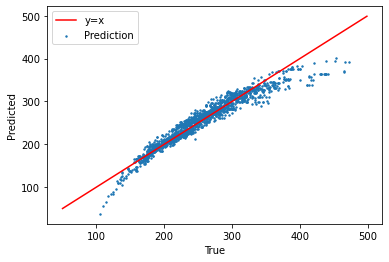

In [245]:
plt.scatter(y_test,predictions, label='Prediction', s=2)
plt.plot(range(50,500), range(50,500), 'r', label='y=x')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()

Seem to do ok in the mid-range, less well at extremes. Expect this as there is much less data at the extremes.

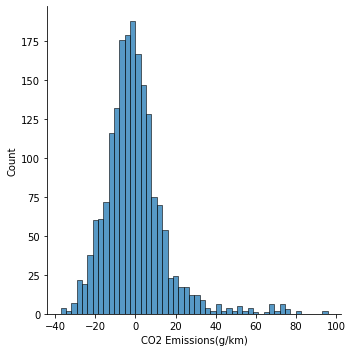

In [246]:
sns.displot((y_test-predictions), bins=50);

In [237]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10.66693973907483
RMSE: 15.501814065380735


Can this be improved with a different model?